In [1]:
# data analysis and wrangling
# import pandas as pd
import numpy as np
import random as rnd
import math

# visualization
# import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
def get_test_track(s):
    i,moves,des = s.split(' ')
    moves=moves.split(';')[:-1]
    moves=[move.split(',') for move in moves]
    moves=[[int(ll) for ll in l] for l in moves]
    des=[float(p) for p in des.split(',')]
#     flag=int(flag)
#     print(i,moves[0],'->',des,flag)
    m = np.matrix(moves)
    m = m[np.lexsort(m.T)][0]
#     print(m)
    return (i,(m[0,0],m[0,1]), m, des)
    

In [105]:
def sort_track(track):
    #此函数用于将矩阵沿-1属性排序
    return track[np.lexsort(track.T)][0]
    
def get_track(s):
    i,moves,des,flag = s.split(' ')
    moves=moves.split(';')[:-1]
    moves=[move.split(',') for move in moves]
    moves=[[int(ll) for ll in l] for l in moves]
    des=[float(p) for p in des.split(',')]
    flag=int(flag)
#     print(i,moves[0],'->',des,flag)
    m = sort_track(np.matrix(moves))
#     print(m)
    return (i,(m[0,0],m[0,1]), m, des, flag)
def to_percent(mat):
    return np.nan_to_num(mat/mat.sum(axis=1).reshape(-1,1))
def plot(data, rows=3, cols=3):
    for i,s in enumerate(data):
        if i >= rows*cols:
            break
        start, track, des, flag = get_track(s)
        canvas = plts[i//cols][i%cols]
        canvas.plot(*start, '.b')
        canvas.plot(track[:,0],track[:,1],'-g')
        canvas.plot(*des,'.r')

In [4]:

#按首列分布聚合
def get_distr(mat, part=4, min=None, max=None, percent=True):
    assert part!=0
    assert mat.shape[1] >= 2
    min = mat[:,0].min() if min is None else min
    max = mat[:,0].max() if max is None else max
    parts = []
    space = (max-min)/part
    for i in range(part):
        RangeBool = np.all([mat[:,0]>=space*i+min,mat[:,0]<space*(i+1)+min],axis=0)
        parts.append(RangeBool.flat)
    distributions = np.array([mat[np.ix_(p, [0,1])].sum(axis=0).flat[1] for p in parts])
    distributions = to_percent(distributions.reshape(1, -1)) if percent else distributions
    return distributions
    
def theta_distr(theta, part=4):
    return get_distr(theta, part, min=0, max=math.pi)

In [5]:
human = []
machine = []
test = []
with open('dsjtzs_txfz_training.txt') as f:
    people = list(filter(lambda l:l.strip().endswith('1'),f.readlines()))
    f.seek(0)
    machine = list(filter(lambda l:l.strip().endswith('0'),f.readlines()))
with open('dsjtzs_txfz_test1.txt') as f:
    test = f.readlines()

In [76]:
def get_acceleration(track,bias = 1):
    '''
    此函数用于获得加速度，至少需要三个点，具体公式是解三个点用加速度表示时的方程组
    这里将时间差强行+1，是为了防止同一时间出现了两个点造成的inf
    固有偏差影响，视平均时间差不同，加速度总体上大约缩小了0.25%
    '''
    assert track.shape[0] >= 3
    B_sub_A = track[1:-1] - track[:-2]
    C_sub_A = track[2:] - track[:-2]
    C_sub_B = track[2:] - track[1:-1]
    a = (- B_sub_A[:,:-1] / (B_sub_A[:,-1].reshape((-1,1))+bias) + \
        C_sub_A[:,:-1] / (C_sub_A[:,-1].reshape((-1,1)) + bias)) / \
        (C_sub_B[:,-1].reshape((-1,1))+bias) * 2
    return a

index, start, track, des, flag = get_track(people[3])
# get_acceleration(track)
# print(track)
get_acceleration(np.matrix([[0,0,0],[1,1,1],[3,3,2]]), bias=0) #测试数据，函数正确的话加速度应为1


matrix([[ 1.,  1.]])

In [96]:
def get_speed(track, bias=1):
    '''
    此函数用于获得速度，至少需要三个点，具体公式是解三个点用速度表示时的方程组
    这里默认时间偏差+1，是为了防止同一时间出现了两个点造成的inf
    固有偏差影响，视平均时间差不同，速度总体上大约缩小了0.25%
    '''
    assert track.shape[0] >= 3
    B_sub_A = track[1:-1] - track[:-2]
    C_sub_A = track[2:] - track[:-2]
    C_sub_B = track[2:] - track[1:-1]
    sp = np.multiply((C_sub_B[:,:-1] / np.square(C_sub_B[:,-1]+bias).reshape((-1,1)) + \
        B_sub_A[:,:-1] / np.square(B_sub_A[:,-1]+bias).reshape((-1,1))) ,
        (B_sub_A[:,-1].reshape((-1,1))+bias))
    sp = np.multiply(sp, (C_sub_B[:,-1].reshape((-1,1))+bias))
    sp = sp/(C_sub_A[:,-1].reshape((-1,1))+bias)
    return sp

index, start, track, des, flag = get_track(people[0])
get_speed(track)
# print(track)
# get_speed(np.matrix([[0,0,0],[1,1,1],[3,3,2]]), bias=0) #测试数据，函数正确的话加速度应为1.5


matrix([[  5.02491694e-01,   1.20930233e-01],
        [  9.01034363e-01,   1.12808053e-01],
        [  1.29769231e+00,   0.00000000e+00],
        [  1.58739939e+00,   0.00000000e+00],
        [  1.79058893e+00,   0.00000000e+00],
        [  1.50737855e+00,   0.00000000e+00],
        [  1.01941748e+00,   0.00000000e+00],
        [  9.73406593e-01,   0.00000000e+00],
        [  7.09560440e-01,   1.22500000e-01],
        [  6.11650485e-01,   1.26213592e-01],
        [  8.15533981e-01,   0.00000000e+00],
        [  9.51456311e-01,   0.00000000e+00],
        [  1.09928673e+00,   0.00000000e+00],
        [  1.36913510e+00,   0.00000000e+00],
        [  2.44493882e+00,   0.00000000e+00],
        [  2.21776463e+00,   0.00000000e+00],
        [  7.19203040e-01,   0.00000000e+00],
        [  4.17971905e-01,   0.00000000e+00],
        [  3.32707911e-01,   0.00000000e+00],
        [  2.78320099e-01,   0.00000000e+00],
        [  4.46171618e-01,   1.71421721e-01],
        [  1.15294118e+00,   3.058

In [167]:
def expand_track(track, max_sample=200):
    '''
    此函数用来扩充取样点，具体扩充方法是每两个点取似然中间点，符合x和y轴上速度相似的设定
    为了扩充至少需要三个点，来计算加速度。
    我认为，如果只有两个点，那无论什么模型都很难判断轨迹是否是robot，所以不如当作脏数据清洗掉
    输入为track的matrix,返回扩充后的matrix，shape'=(shape[0]*2-1, shape[1])
    '''
    max_exp = max_sample - track.shape[0]#最大扩充点数，使得扩充后的样点数量不大于max_sample
    v = get_speed(track)
    a = get_acceleration(track)
    t = track[1:,-1] - track[:-1,-1]
    #加速度相等的推测点算法，结果轨迹不正常
#     Xb = track[1:-1,:-1] - np.multiply(v,t[:-1]/2) - np.multiply(a, np.square(t[:-1]/2))*0.5
#     Xb_e = track[-2,:-1] + np.multiply(v[-1],t[-1]/2) + np.multiply(a[-1], np.square(t[-1]/2))*0.5
#     to_exp = np.vstack([Xb, Xb_e])
    #速度相等的推测点算法，结果能接受
#     Xb = track[1:-1,:-1] + np.multiply(v,t[1:]/2)
#     Xb_s = track[1,:-1] - np.multiply(v[0],t[0]/2)
#     to_exp = np.vstack([Xb_s, Xb])
    #直接取中间点，对轨迹影响最小
    Xb = (track[:-1] + track[1:])/2
    to_exp = Xb
    expanded =  np.vstack([track, to_exp]) if to_exp.shape[0] <= max_exp else np.vstack([track, to_exp[:max_exp]])
    return sort_track(expanded)

index, start, track, des, flag = get_track(people[0])
# print(track)
expand_track(track)
    

matrix([[  353. ,  2607. ,   349. ],
        [  360. ,  2607. ,   362.5],
        [  367. ,  2607. ,   376. ],
        [  377.5,  2613.5,   397. ],
        [  388. ,  2620. ,   418. ],
        [  402. ,  2620. ,   430. ],
        [  416. ,  2620. ,   442. ],
        [  458. ,  2620. ,   467.5],
        [  500. ,  2620. ,   493. ],
        [  542. ,  2620. ,   520. ],
        [  584. ,  2620. ,   547. ],
        [  629.5,  2620. ,   569.5],
        [  675. ,  2620. ,   592. ],
        [  699.5,  2620. ,   617.5],
        [  724. ,  2620. ,   643. ],
        [  752. ,  2620. ,   668.5],
        [  780. ,  2620. ,   694. ],
        [  801. ,  2620. ,   718. ],
        [  822. ,  2620. ,   742. ],
        [  836. ,  2626.5,   767.5],
        [  850. ,  2633. ,   793. ],
        [  867.5,  2633. ,   818.5],
        [  885. ,  2633. ,   844. ],
        [  909.5,  2633. ,   869.5],
        [  934. ,  2633. ,   895. ],
        [  958.5,  2633. ,   920.5],
        [  983. ,  2633. ,   946. ],
 

In [149]:
a = np.arange(12).reshape((-1,3))
a = np.matrix(a)
print(np.argsort(a[:,2],axis=0)>1)
a[np.ix_((np.argsort(a[:,2],axis=0)>1).flat,[0,1])]

[[False]
 [False]
 [ True]
 [ True]]


matrix([[ 6,  7],
        [ 9, 10]])

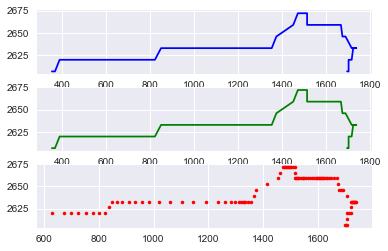

In [168]:
def drop_track(track, max_sample=100):
    '''
    此函数用于将轨迹中超过数量的点抛弃
    抛弃规则是时间距离越近越容易被抛弃
    '''
    t = track[1:,-1] - track[:-1, -1]
    to_drop = track.shape[0] - max_sample
    assert to_drop >= 0
    return track[np.ix_((np.argsort(track[:,-1],axis=0)>to_drop-1).flat,[0,1])]


In [6]:
def find_stab(track, stride=100, height=30, max_t=50):
    pace = stride / 2
    stabs = []
    trackT = track.copy()
    trackT[1:,2] = trackT[1:,0]>=trackT[:-1,0]
    trackT[0,2] = 1
#     print(track)
    for i in range(1, track.shape[0]):
        trend = track[i,0] >= track[i-1,0]
        Range = np.all([track[:,0]>=track[i,0]-pace,
                        track[:,0]<=track[i,0]+pace,
                        trackT[:,2]==trend ,
                        np.abs(track[:,2] - track[i,2]) < max_t,
                       ],axis=0)
        r = track[np.ix_(Range.flat, [0,1])]
        s = np.abs(track[i,1] - (r[0,1]+r[-1,1])/2)
        if s > height:
            stabs.append(np.hstack([track[i,0:2], np.matrix([s])]))
#         print(r[0,1], r[-1,1], (r[0,1]+r[-1,1])/2, track[i,1] - (r[0,1]+r[-1,1])/2)
    if len(stabs) > 0:
        return np.vstack([*stabs])
    else:
        return np.zeros((1,3))#固有
    
def find_stab_2(track,height=0):
    stabs = []
    track[1:,2][track[1:,1]>track[:-1,1]] = 1
    track[1:,2][track[1:,1]<track[:-1,1]] = -1
    track[1:,2][track[1:,1]==track[:-1,1]] = 0
    track[0,2] = track[1,2]
    track[:-1,2] = np.abs(track[1:,2] - track[:-1,2])
    track[-1,2] = 0
#     print(track)
    stabs = track[np.ix_((track[:,2]!=0).flat, [0,1])]
    if stabs.shape[0] == 0:
        return None
    condx = np.all([np.abs(stabs[1:,1]-stabs[:-1,1])>=height,], axis=0)
    return np.vstack([track[0,0:2],stabs[0],stabs[1:][np.ix_(condx.flat, [0,1])], track[-1,0:2]])
    
index, start, track, des, flag = get_track(machine[315])
stabs = find_stab_2(track)
print(stabs)
np.abs((stabs[1:-1,1] - (stabs[2:,1]+stabs[:-2,1])/2)/(stabs[2:,0]-stabs[:-2,0]+1)).max()

# track[1:,2][track[1:,1]>track[:-1,1]] = 1
# track[1:,2][track[1:,1]<track[:-1,1]] = -1
# track[1:,2][track[1:,1]==track[:-1,1]] = 0
# track[0,2] = track[1,2]
# track[:-1,2] = np.abs(track[1:,2] - track[:-1,2])
# print(track)

[[ 269 2503]
 [ 444 2594]
 [ 696 2594]
 [ 773 2490]
 [ 850 2594]
 [ 885 2594]
 [ 899 2581]
 [ 906 2594]
 [ 976 2594]]


0.67096774193548392

In [9]:
import random
# random.shuffle(people)
# random.shuffle(machine)
def show_data_attr(data, limit=100):
    for i,s in enumerate(data):
        if i >= limit:
            break
        index, start, track, des, flag = get_track(s)
        
        print(index, track.shape[0])
#         track = np.vstack([track[0], track, track[-1]])#添加固定偏差来保证数据有效
#         delta = track[1:] - track[:-1]
#         delta[:,2]+=1#固定偏差用来消除0

#         angular = np.arccos(delta[:,0]/np.sqrt(np.square(delta[:,0])+np.square(delta[:,1])))
#         angular = np.nan_to_num(angular)
#         angularDeltaTime = np.hstack((angular, delta[:,2]))#x1角度,x2为时间差
#         timeAngular = np.hstack((track[1:,2],angular))#x1为时间，x2为角度

#         angularVelocity = (angular[1:] - angular[:-1])/delta[1:,2]#角速度
#         angularVelocityDeltaTime = np.hstack((np.nan_to_num(angularVelocity), delta[1:,2]))#x1角度,x2为时间差
#         timeAngularVelocity = np.hstack((track[2:,2],np.nan_to_num(angularVelocity)))#x1为时间，x2为角度

#         speed = np.sqrt(np.square(delta[:,0])+np.square(delta[:,1]))/delta[:,2]
#         timeSpeed = np.hstack((track[1:,2],np.nan_to_num(speed)))#x1为时间，x2为速度
#         speedDeltaTime = np.hstack((np.nan_to_num(speed), delta[:,2]))#x1为速度，x2为时间差

#         acceleration = (speed[1:,0] - speed[:-1,0])/delta[1:,2]#加速度
#         accelerationDeltaTime = np.hstack((np.nan_to_num(acceleration), delta[1:,2]))
#         timeAcceleration = np.hstack((track[2:,2], np.nan_to_num(acceleration)))

#         trackGrad = (track[1:,1] - track[:-1,1])/(track[1:,0] - track[:-1,0])
        
        
    #     trackHessen = (trackGrad[1:,1] - trackGrad[:-1,1])/(trackGrad[1:,0] - trackGrad[:-1,0])
    #     print('speed-max:%f'%speed[:,0].max()
    #           ,"mean:%f"%speed[:,0].mean()
    #           ,"std:%f"%speed[:,0].std()
    #           ,"%%25time speed:%f"%(get_distr(timeSpeed,part=4)[0][0])
    #           ,"%%25speed time:%f"%(get_distr(speedDeltaTime,part=4)[0][0])
    #          )    

    #     print('acceleration-max:%f'%acceleration[:,0].max()
    #           ,"mean:%f"%acceleration[:,0].mean()
    #           ,"std:%f"%acceleration[:,0].std()
    #           ,"%%25time acceleration:%f"%(get_distr(timeAcceleration,part=4)[0][0])
    #           ,"%%25acceleration time:%f"%(get_distr(accelerationDeltaTime,part=4)[0][0])
    #          )

    #     print('angular-max:%f'%angular[:,0].max()
    #       ,"mean:%f"%angular[:,0].mean()
    #       ,"std:%f"%angular[:,0].std()
    #       ,"%%25time angular:%f"%(get_distr(timeAngular,part=4)[0][0])
    #       ,"longest angular time:%f"%(get_distr(angularDeltaTime,part=16)[0].max())
    #      )

    #     print('angularVelocity-max:%f'%angularVelocity[:,0].max()
    #       ,"mean:%f"%np.abs(angularVelocity[:,0]).mean()
    #       ,"std:%f"%angularVelocity[:,0].std()
    #       ,"%%25 time angularVelocity:%f"%(get_distr(np.abs(timeAngularVelocity),part=4)[0][0])
    #       ,"%%25 angularVelocity time:%f"%(get_distr(np.abs(angularVelocityDeltaTime),part=8)[0][0])
    #      )

    #     print('track-range-x:%f -y:%f'%((track[:,0].max() - track[:,0].min()), (track[:,1].max() - track[:,1].min()))
    #       ,"mean-x:%f -y:%f"%((track[:,0].mean()), (track[:,1].mean()))
    #       ,"std-x:%f -y%f"%((track[:,0].std()), (track[:,1].std()))
    #       ,"hessen:%f"%(1)
    # #     ,"%%25 time track:%f"%(get_distr(np.abs(track[:,0:]),part=4)[0][0])
    # #     ,"%%25 track time:%f"%(get_distr(np.abs(angularVelocityDeltaTime),part=8)[0][0])
    #      )

    #     print(trackHessen)
#         stabs = find_stab_2(track,height=0)
#         if stabs is None:
# #             print(index,0)
#             pass
#         elif stabs.shape[0] >= 3:
#             winX = track[:,0].max() - track[:,0].min()
#             winY = track[:,1].max() - track[:,1].min()
#             stabs = np.min(
#                 np.abs(
#                 np.hstack([stabs[1:-1,1]-stabs[2:,1],stabs[1:-1,1]-stabs[:-2,1]])
#                 ),axis=1)/winY*winX/(stabs[2:,0]-stabs[:-2,0]+10)
#             t = stabs.max()
#             if stabs.max() > 1.5:
#                 print(index,stabs.max(), np.count_nonzero(stabs>1.5))
#         else:
#             print(index,0)
    #     elif stabs.shape[0] == 1:
    #         print(1, 0, 0)
    #     else:
    #         print(stabs.shape[0], np.abs(stabs[1:,1]-stabs[:-1,1]).mean(), np.abs(stabs[1:,1]-stabs[:-1,1]).max())
    #         print(0)
    #         if stabs.shape[0] >= 3:
    #             print(((stabs[1:-1,1] - (stabs[2:,1]+stabs[:-2,1])/2)/(stabs[2:,0]-stabs[:-2,0])).max())
    #     print('-'*6)
    #     print(get_distr(speed_grad))

show_data_attr(people[:],limit=10000)

1 56
2 68
3 80
4 62
5 89
6 36
7 152
8 29
9 57
10 36
11 45
12 41
13 49
14 58
15 68
16 57
17 121
18 75
19 65
20 172
21 198
22 32
23 29
24 52
25 60
26 163
27 41
28 53
29 143
30 70
31 54
32 112
33 92
34 33
35 100
36 68
37 51
38 64
39 42
40 59
41 17
42 37
43 45
44 60
45 90
46 253
47 75
48 143
49 50
50 67
51 99
52 71
53 29
54 46
55 101
56 92
57 58
58 125
59 53
60 59
61 16
62 38
63 106
64 101
65 109
66 38
67 46
68 39
69 177
70 16
71 66
72 83
73 69
74 58
75 32
76 95
77 36
78 54
79 40
80 107
81 83
82 30
83 106
84 97
85 22
86 92
87 63
88 59
89 54
90 80
91 167
92 62
93 56
94 68
95 85
96 62
97 96
98 122
99 42
100 41
101 251
102 64
103 49
104 128
105 122
106 54
107 150
108 69
109 93
110 82
111 31
112 27
113 68
114 131
115 92
116 64
117 60
118 88
119 89
120 17
121 99
122 83
123 25
124 163
125 56
126 84
127 68
128 76
129 89
130 64
131 101
132 96
133 61
134 95
135 87
136 66
137 62
138 104
139 68
140 116
141 63
142 122
143 65
144 103
145 141
146 76
147 58
148 44
149 46
150 33
151 104
152 69
153 45
154 

/home/miller/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in true_divide
/home/miller/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:31: RuntimeWarning: divide by zero encountered in true_divide
/home/miller/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:31: RuntimeWarning: invalid value encountered in true_divide


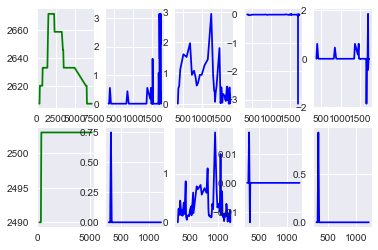

In [102]:
saves = 10000
rows,cols=2,5
# data = machine
data = people
fig,plts = plt.subplots(rows,cols)
for i,s in enumerate(data[0:]):
    if i >= rows:
        break
    index, start, track, des, flag = get_track(s)
    track = np.vstack([track[0], track, track[-1]])#添加固定偏差来保证数据有效
    delta = track[1:] - track[:-1]
    delta[:,2]+=1#固定偏差用来消除0
    
    angular = np.arccos(delta[:,0]/np.sqrt(np.square(delta[:,0])+np.square(delta[:,1])))
    angular = np.nan_to_num(angular)
    angularDeltaTime = np.hstack((angular, delta[:,2]))#x1角度,x2为时间差
    timeAngular = np.hstack((track[1:,2],angular))#x1为时间，x2为角度
    
    angularVelocity = (angular[1:] - angular[:-1])/delta[1:,2]#角速度
    angularVelocityDeltaTime = np.hstack((np.nan_to_num(angularVelocity), delta[1:,2]))#x1角度,x2为时间差
    timeAngularVelocity = np.hstack((track[2:,2],np.nan_to_num(angularVelocity)))#x1为时间，x2为角度
    
    speed = np.sqrt(np.square(delta[:,0])+np.square(delta[:,1]))/delta[:,2]
    timeSpeed = np.hstack((track[1:,2],np.nan_to_num(speed)))#x1为时间，x2为速度
    speedDeltaTime = np.hstack((np.nan_to_num(speed), delta[:,2]))#x1为速度，x2为时间差
    
    acceleration = (speed[1:,0] - speed[:-1,0])/delta[1:,2]#加速度
    accelerationDeltaTime = np.hstack((np.nan_to_num(acceleration), delta[1:,2]))
    timeAcceleration = np.hstack((track[2:,2], np.nan_to_num(acceleration)))
    
    trackGrad = (track[1:,1] - track[:-1,1])/(track[1:,0] - track[:-1,0])
    speedY = delta[:,1]/delta[:,2]
#     trackHessen = (trackGrad[1:] - trackGrad[:-1])/(trackGrad[1:,0] - trackGrad[:-1,0])
    
    

    canvas = plts[i][0]#轨迹
    canvas.plot(track[:,2],track[:,1],'-g')
#     canvas.plot(*start, '.r')
#     stabs = find_stab(track, stride=100, height=25, max_t=100)
    stabs = find_stab_2(track, height=0)
    deltax = track[:,0].max() - track[:,0].min()
    deltay = track[:,1].max() - track[:,1].min()
#     stabs_t = np.abs((stabs[1:-1,1] - (stabs[2:,1]+stabs[:-2,1])/2)/deltay*deltax/(stabs[2:,0]-stabs[:-2,0]+1))
#     t = stabs_t.max()
#     print(stabs_t)
#     print(index,stabs_t.max(), np.count_nonzero(stabs_t>1.5))
#     canvas.plot(stabs[:,0], stabs[:,1], '.r') if stabs is not None else False
#     canvas.plot(*des,'.r')
    canvas = plts[i][1]#角度
    canvas.plot(track[1:,0],angular,'-b')
    canvas = plts[i][2]#移动速度
    canvas.plot(track[1:,0],speed,'-b')
    canvas = plts[i][3]#角速度
    canvas.plot(track[2:,0],angularVelocity,'-b')
#     canvas = plts[i][4]#加速度
#     canvas.plot(track[2:,0],acceleration,'-b')
    canvas = plts[i][4]#轨迹Hessen
    canvas.plot(track[1:,0],trackGrad,'-b')
#     print(track, np.nan_to_num(trackGrad))

In [66]:
data = people
saves = len(data)
paramNums = 21
parameters = np.empty((saves, paramNums))
for i,s in enumerate(data):
    if i >= saves:
        break
    index, start, track, des, flag = get_track(s)
#     index, start, track, des = get_test_track(s)
    track = np.vstack([track[0], track, track[-1]])#添加固定偏差来保证数据有效
    delta = track[1:] - track[:-1]
    delta[:,2]+=1#固定偏差用来消除0
    
    angular = np.arccos(delta[:,0]/np.sqrt(np.square(delta[:,0])+np.square(delta[:,1])))
    angular = np.nan_to_num(angular)
    angularDeltaTime = np.hstack((np.nan_to_num(angular), delta[:,2]))#x1角度,x2为时间差
    timeAngular = np.hstack((track[1:,2],np.nan_to_num(angular)))#x1为时间，x2为角度
    
    angularVelocity = (angular[1:] - angular[:-1])/delta[1:,2]#角速度
    angularVelocityDeltaTime = np.hstack((np.nan_to_num(angularVelocity), delta[1:,2]))#x1角度,x2为时间差
    timeAngularVelocity = np.hstack((track[2:,2],np.nan_to_num(angularVelocity)))#x1为时间，x2为角度
    
    speed = np.sqrt(np.square(delta[:,0])+np.square(delta[:,1]))/delta[:,2]
    timeSpeed = np.hstack((track[1:,2],np.nan_to_num(speed)))#x1为时间，x2为速度
    speedDeltaTime = np.hstack((np.nan_to_num(speed), delta[:,2]))#x1为速度，x2为时间差
    
    acceleration = (speed[1:,0] - speed[:-1,0])/delta[1:,2]#加速度
    accelerationDeltaTime = np.hstack((np.nan_to_num(acceleration), delta[1:,2]))
    timeAcceleration = np.hstack((track[2:,2], np.nan_to_num(acceleration)))
    
    stabs = find_stab_2(track,height=0)
    if stabs is not None and stabs.shape[0] >= 3:
        stabMax = np.abs((stabs[1:-1,1] - (stabs[2:,1]+stabs[:-2,1])/2)/(stabs[2:,0]-stabs[:-2,0]+1)).max()
    else:
        stabMax = 0
#     indexs[i] = index
    parameters[i] = [speed[:,0].max(),
                     speed[:,0].mean(), 
                     speed[:,0].std(), 
                     get_distr(timeSpeed,part=4)[0][0],
                     get_distr(speedDeltaTime,part=4)[0][0],
                     
                     acceleration[:,0].max(),
                     acceleration[:,0].mean(),
                     acceleration[:,0].std(),
                     get_distr(timeAcceleration,part=4)[0][0],
                     get_distr(accelerationDeltaTime,part=4)[0][0],
                     
                     angular[:,0].max(),
                     angular[:,0].mean(),
                     angular[:,0].std(),
                     get_distr(timeAngular,part=4)[0][0],
                     get_distr(angularDeltaTime,part=16)[0].max(),
                     
                     angularVelocity[:,0].max(),
                     np.abs(angularVelocity[:,0]).mean(),
                     angularVelocity[:,0].std(),
                     get_distr(np.abs(timeAngularVelocity),part=4)[0][0],
                     get_distr(np.abs(angularVelocityDeltaTime),part=8)[0].max(),
                     
                     stabMax,
                    ]
    if np.any(np.isnan(parameters[i])) or np.any(parameters[i]>10000):
        print(index)
        print(parameters[i])
        break
    
root = 'processed'

with open('%s/human_%d'%(root, paramNums), 'w') as f:
    parameters.tofile(f)
    print("Done")
# with open('test_index', 'w') as f:
#     indexs.tofile(f)
#     print("Done")
#     print('speed-max:%f'%speed[:,0].max()
#           ,"mean:%f"%speed[:,0].mean()
#           ,"std:%f"%speed[:,0].std()
#           ,"%%25time speed:%f"%(get_distr(timeSpeed,part=4)[0][0])
#           ,"%%25speed time:%f"%(get_distr(speedDeltaTime,part=4)[0][0])
#          )    

#     print('acceleration-max:%f'%acceleration[:,0].max()
#           ,"mean:%f"%acceleration[:,0].mean()
#           ,"std:%f"%acceleration[:,0].std()
#           ,"%%25time acceleration:%f"%(get_distr(timeAcceleration,part=4)[0][0])
#           ,"%%25acceleration time:%f"%(get_distr(accelerationDeltaTime,part=4)[0][0])
#          )

#     print('angular-max:%f'%angular[:,0].max()
#       ,"mean:%f"%angular[:,0].mean()
#       ,"std:%f"%angular[:,0].std()
#       ,"%%25time angular:%f"%(get_distr(timeAngular,part=4)[0][0])
#       ,"longest angular time:%f"%(get_distr(angularDeltaTime,part=16)[0].max())
#      )
    
#     print('angularVelocity-max:%f'%angularVelocity[:,0].max()
#       ,"mean:%f"%np.abs(angularVelocity[:,0]).mean()
#       ,"std:%f"%angularVelocity[:,0].std()
#       ,"time angularVelocity:%f"%(get_distr(np.abs(timeAngularVelocity),part=4)[0][0])
#       ,"angularVelocity time:%f"%(get_distr(np.abs(angularVelocityDeltaTime),part=8)[0][0])
#      )

/home/miller/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in true_divide
/home/miller/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in true_divide


Done


/home/miller/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in true_divide


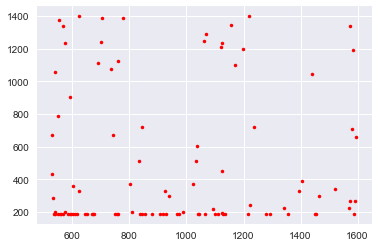

In [18]:
saves = 400
# fig,plts = plt.subplots(2)
# for i,s in enumerate(people):
#     if i >= 1000:
#         break
#     index, start, track, des, flag = get_track(s)
# #     track = np.vstack([track[0], track, track[-1]])#添加固定偏差来保证数据有效
# #     des = np.array(des) + np.array(start)
#     plt.plot(des[0], des[1],'.b')
for i,s in enumerate(machine[-100:]):
    if i >= saves:
        break
    index, start, track, des, flag = get_track(s)
    track = np.vstack([track[0], track, track[-1]])#添加固定偏差来保证数据有效
    delta = track[1:] - track[:-1]
    delta[:,2]+=1#固定偏差用来消除0
    
    angular = np.arccos(delta[:,0]/np.sqrt(np.square(delta[:,0])+np.square(delta[:,1])))
    angular = np.nan_to_num(angular)
#     des = np.array(des) + np.array(start)
#     track = np.vstack([track[0], track, track[-1]])#添加固定偏差来保证数据有效
    plt.plot(des[0], des[1],'.r')

In [105]:
from random import shuffle
import os
# shuffle(machine)
saves = 10000

dirs = ['data/people/speed_grad', 'data/people/angle_grad', 'data/people/speed', 'data/people/angle',
       'data/machine/speed_grad', 'data/machine/angle_grad', 'data/machine/speed', 'data/machine/angle',
       'data/people/y_track', 'data/machine/y_track']
for dir_ in dirs:
    if not os.path.isdir(dir_) and not os.path.isfile(dir_):
        os.makedirs(dir_)
        print("mkdir %s"%dir_)
    
for i,s in enumerate(machine):
    if i >= saves:
        break
    index, start, track, des, flag = get_track(s)
    delta = track[1:] - track[:-1]
    theta = np.arccos(delta[:,0]/np.sqrt(np.square(delta[:,0])+np.square(delta[:,1])))
    theta_speed = (theta[1:] - theta[:-1])/delta[1:,2]
    speed = np.sqrt(np.square(delta[:,0])+np.square(delta[:,1]))/delta[:,2]
    speed_grad = (speed[1:] - speed[:-1])/delta[1:,2]
#     print(speed)
#     canvas = plt
#     canvas.plot(*start, '.b')
#     plt.figure(figsize=(5,5),dpi=20,edgecolor='k')
#     plt.plot(track[1:,2],theta,'-b',linewidth=10)
#     plt.axis('off')
#     plt.savefig('data/people/angle/%s.png'%index)
#     plt.close()
#     plt.plot(track[1:,2],speed,'-b',linewidth=10)
#     plt.axis('off')
#     plt.savefig('data/people/speed/%s.png'%index)
#     plt.close()
#     plt.plot(track[2:,2],theta_speed,'-b',linewidth=10)
#     plt.axis('off')
#     plt.savefig('data/people/angle_grad/%s.png'%index)
#     plt.close()
#     plt.plot(track[2:,2],speed_grad,'-b',linewidth=10)
#     plt.axis('off')
#     plt.savefig('data/people/speed_grad/%s.png'%index)
#     plt.close()

    plt.figure(figsize=(5,5),dpi=20,edgecolor='k')
    plt.plot(track[:,2],track[:,1],'-b',linewidth=10)
    plt.axis('off')
    plt.savefig('data/people/y_track/%s.png'%index)
    plt.close()
    

#     misc.imsave('data/machine/lena_new_sz.png', track)

/home/miller/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in true_divide
